<a href="https://colab.research.google.com/github/Arpit2811/OIBSIP/blob/main/oasis_project_Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing Libraries for Analysis.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


2. Loading the Csv File.


In [11]:
df = pd.read_csv('ifood_df.csv')
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


3. Identifying basic Info of the dataset

In [12]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


4. Removing duplicate values.

In [22]:
df.drop_duplicates(inplace=True)
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Purchase_Frequency,Cluster,PCA1,PCA2
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,51687.258783,0.443345,0.509649,48.880752,306.492331,26.364671,166.059871,37.603662,27.268679,43.921821,...,0.502227,0.165760,0.217219,563.789213,519.867392,0.302326,0.302326,1.445324,0.001652,0.004191
std,20713.046401,0.536196,0.546393,28.950917,337.603877,39.776518,219.869126,54.892196,41.575454,51.678211,...,0.500119,0.371957,0.412455,576.775749,554.797857,0.680812,0.680812,0.907943,2.316491,1.109335
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000,0.000000,0.000000,-3.143349,-2.557268
25%,35416.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,55.000000,42.000000,0.000000,0.000000,1.000000,-2.077464,-1.039008
50%,51412.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,1.000000,0.000000,0.000000,343.000000,288.000000,0.000000,0.000000,1.000000,-0.743125,0.064236
75%,68274.000000,1.000000,1.000000,74.000000,507.000000,33.000000,230.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,964.000000,883.000000,0.000000,0.000000,2.000000,1.831914,0.847742
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.000000,4.000000,3.000000,6.939435,4.429459


5. Descrpitive Statistics.

In [23]:
avg_purchase_value = df['MntTotal'].mean()
print(f"Average Purchase Value: ₹{avg_purchase_value:.2f}")
purchase_frequency = df['AcceptedCmpOverall'].mean()
print(f"Average Purchase Frequency (campaigns accepted): {purchase_frequency:.2f}")


Average Purchase Value: ₹563.79
Average Purchase Frequency (campaigns accepted): 0.30


6. Feature Selection & Scaling

In [25]:
features = [
    'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
    'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'MntTotal'
]
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


7. K-Means Clustering

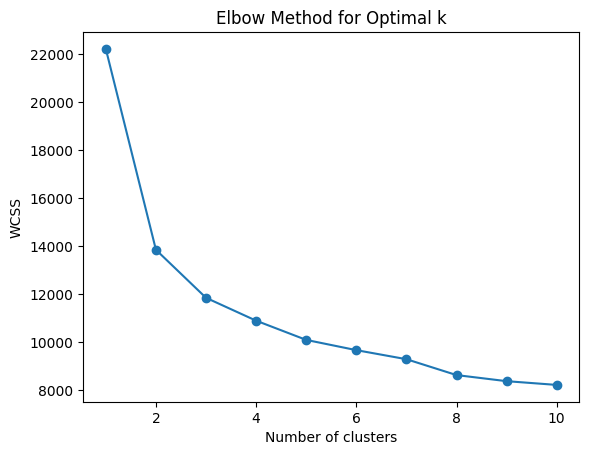

In [26]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [27]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


8. Visualisation

8.1  Cluster Distribution

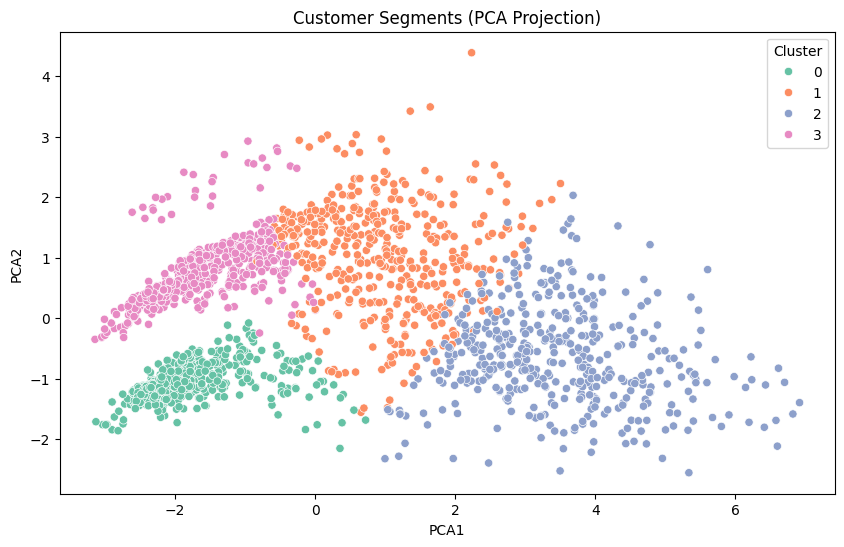

In [28]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X_scaled)

df['PCA1'] = pca_features[:, 0]
df['PCA2'] = pca_features[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Customer Segments (PCA Projection)')
plt.show()


8.2 Cluster-wise Spending

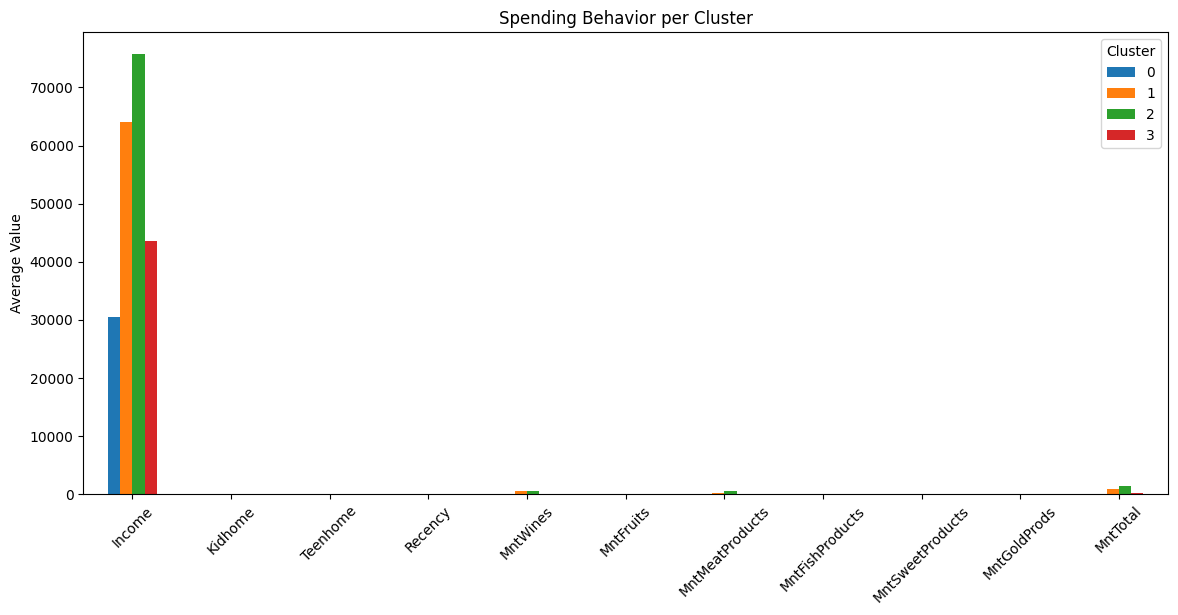

In [29]:
cluster_avg = df.groupby('Cluster')[features].mean()
cluster_avg.T.plot(kind='bar', figsize=(14, 6))
plt.title('Spending Behavior per Cluster')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.show()


Insights:
1. Cluster 0: High-income, high-spenders — ideal for premium product marketing.

2. Cluster 1: Low-income, low engagement — target with discounts or loyalty programs.

3. Cluster 2: Young families — upsell family packs and kid-friendly products.

4. Cluster 3: High recency — re-engage with campaigns or exclusive offers.

Recommendations:
1. Personalize email campaigns based on segment behavior.
2. Offer bundle deals to high-potential customers.
3. Monitor segment movement over time to adapt strategies.
